# Rieke Manookin lab DataJoint tutorial
March 2024

Vyom Raval

Make sure your docker container is running with the terminal command `docker compose up -d`

We are using Samarjit's datajoint repo, so make sure to pull it and include the path below.

In [1]:
samarjit_dj_api = '/Users/riekelabbackup/Desktop/Vyom/gitrepos/samarjit_datajoint/next-app/api/'
import sys
sys.path.append(samarjit_dj_api)
import schema
import helpers.pop as pop

[2025-03-18 11:53:42,586][INFO]: Connecting root@127.0.0.1:3306
[2025-03-18 11:53:43,039][INFO]: Connected root@127.0.0.1:3306


In [2]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob


import pandas as pd
sys.path.append('../data_modules/')
import spikeoutputs as so
import spikeplots as sp
import djutils as dju

Let's connect to the datajoint server hosted in our docker container.

In [3]:
host_address, user, password = '127.0.0.1', 'root', 'simple'
dj.config["database.host"] = f"{host_address}"
dj.config["database.user"] = f"{user}"
dj.config["database.password"] = f"{password}"
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

Define paths to data, and load in any new data.

In [4]:
db = dj.VirtualModule('schema.py', 'schema')
# data_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/data'
data_dir = '/Volumes/data-1/data/h5'
meta_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta'
tags_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags'
username = 'vyomr'
pop.append_data(data_dir, meta_dir, tags_dir, username, db)

Need to convert /Volumes/data-1/data/h5/20230706C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/2023-07-13.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20231003C_old.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/test.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240117C_old.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240514C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20220329C_mouse.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20220405C_mouse.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240418C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240718C.h5 to json
going to implement this eventually
Need to convert /Volumes

100%|██████████| 112/112 [00:00<00:00, 903.90it/s]

Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230406C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230614C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230629C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230713C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230719C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20240418H.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20220406C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20220412C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20220420C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20220426C.json
Already in database: /Volumes/Vyom MEA/data/samarjit_datajoint/data_di

0

This can take a long time if loading in all experiment metadata files for the first time!

## Intro to the database
The database consists of a `schema` which relates different datajoint tables together. We can visualize the entire schema, and peek at different tables to see what's going on.

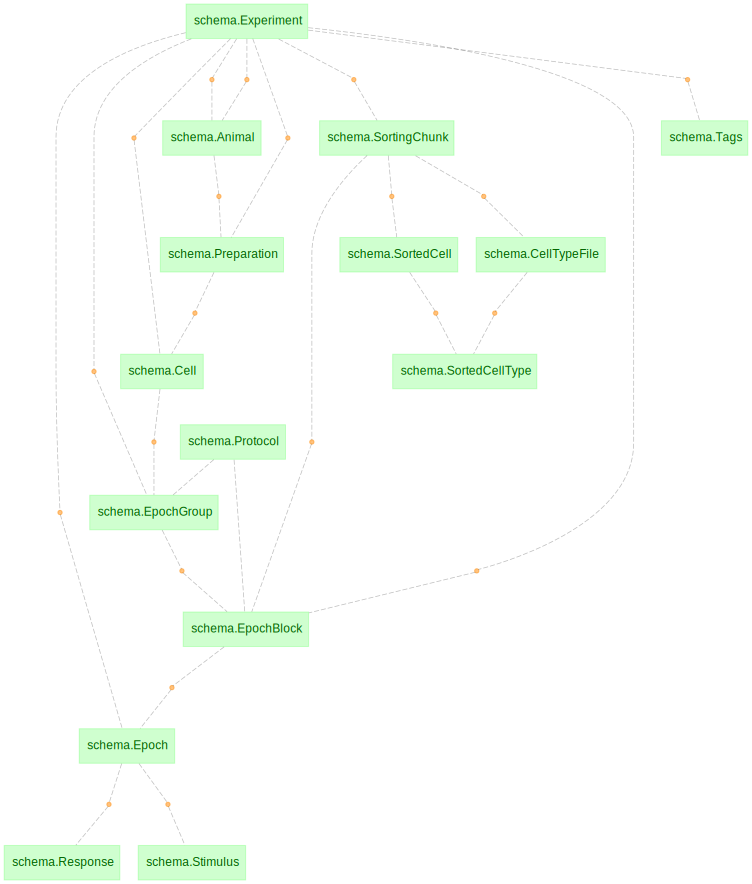

In [5]:
dj.Diagram(schema)

That's a lot to take in. Feel free to step through each table to see what's going on. I'll illustrate ways to look at the tables and fetch their data with the Experiment table.

In [6]:
schema.Experiment() & 'id<4' # Just show first 3 entries

id,h5_uuid,exp_name,meta_file,"data_file empty if MEA for now, maybe should store ""/Volumes/data/data/sorted"" here?",tags_file,"is_mea 1 if MEA, 0 if not",date_added,label,properties,attributes,start_time,experimenter,institution,lab,project,rig,rig_type
1,7d981fc0-2b25-4c48-bc81-5c54f83fab8b,20230406C,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230406C.json,/Volumes/data-1/data/h5/20230406C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags/20230406C.json,1,2025-03-17 15:58:28,20230406,=BLOB=,=BLOB=,2023-04-06 15:36:35,None,None,None,None,None,MEA
2,498dcf21-b568-4687-9825-fb2458df1029,20230614C,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230614C.json,/Volumes/data-1/data/h5/20230614C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags/20230614C.json,1,2025-03-17 15:58:37,20230614,=BLOB=,=BLOB=,2023-06-14 08:21:20,None,None,None,None,None,MEA
3,a6a15586-597b-46f7-99cb-5b3933cf3b5d,20230629C,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20230629C.json,/Volumes/data-1/data/h5/20230629C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags/20230629C.json,1,2025-03-17 15:59:49,20230629,=BLOB=,=BLOB=,2023-06-29 11:46:06,None,None,None,None,None,MEA


In [7]:
# Fetch as a pandas dataframe
df = schema.Experiment().fetch(format='frame').reset_index()
df.loc[:2]

,id,h5_uuid,exp_name,meta_file,data_file,tags_file,is_mea,date_added,label,properties,attributes,start_time,experimenter,institution,lab,project,rig,rig_type
0,1,7d981fc0-2b25-4c48-bc81-5c54f83fab8b,20230406C,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,/Volumes/data-1/data/h5/20230406C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,1,2025-03-17 15:58:28,20230406,"{'id': None, 'age': None, 'sex': None, 'weight...",{'uuid': '7d981fc0-2b25-4c48-bc81-5c54f83fab8b...,2023-04-06 15:36:35,None,None,None,None,None,MEA
1,2,498dcf21-b568-4687-9825-fb2458df1029,20230614C,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,/Volumes/data-1/data/h5/20230614C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,1,2025-03-17 15:58:37,20230614,"{'id': 'A22088', 'age': '3 yo', 'sex': 'female...",{'uuid': '498dcf21-b568-4687-9825-fb2458df1029...,2023-06-14 08:21:20,None,None,None,None,None,MEA
2,3,a6a15586-597b-46f7-99cb-5b3933cf3b5d,20230629C,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,/Volumes/data-1/data/h5/20230629C.h5,/Volumes/Vyom MEA/data/samarjit_datajoint/data...,1,2025-03-17 15:59:49,20230629,"{'id': None, 'age': None, 'sex': None, 'weight...",{'uuid': 'a6a15586-597b-46f7-99cb-5b3933cf3b5d...,2023-06-29 11:46:06,None,None,None,None,None,MEA


When pulling as a pandas dataframe, it's generally helpful to call `reset_index` so you end up with a single 0-based index.

## Querying Workflow
You shouldn't need to step through individual tables for a typical workflow, as there should be utility functions for desired steps. If there isn't a function, help us make one and add it to `djutils`!

In [8]:
import importlib
importlib.reload(dju)
exp_name = '20230614C'
df = dju.mea_exp_summary(exp_name)
df.head()

,data_dir,group_label,NDF,chunk_name,protocol_name,experiment_id,group_id,block_id,chunk_id,protocol_id
0,20230614C/data000,noise,0.0,chunk1,manookinlab.protocols.FastNoise,2,9,9,1,17
1,20230614C/data001,delta size noise,0.0,chunk1,manookinlab.protocols.NoiseSizeModulation,2,10,10,1,18
2,20230614C/data002,delta time noise,0.0,chunk1,manookinlab.protocols.NoiseSizeModulation,2,11,11,1,18
3,20230614C/data003,crf,0.0,chunk1,manookinlab.protocols.ContrastResponseGrating,2,12,12,1,5
4,20230614C/data004,adapt noise spatial,0.0,chunk1,manookinlab.protocols.AdaptNoiseColorSteps,2,13,13,1,19


This lets me see a nice summary of an MEA experiment day. 

Let's query for a specific protocol.

In [9]:
ls_protocols = dju.search_protocol('MovingChromaticBar')
print(ls_protocols)

['manookinlab.protocols.MovingChromaticBar']


Get associated metadata for this protocol.

In [10]:
df_meta = dju.mea_meta_from_protocols(ls_protocols)
df_meta.head()

,data_dir,group_label,NDF,chunk_name,protocol_name,exp_name,data_xxx,is_mea,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20230614C/data009,oriented bars,0.0,chunk2,manookinlab.protocols.MovingChromaticBar,20230614C,data009,1,2,11,18,18,2
1,20230614C/data018,oriented bars,0.0,chunk3,manookinlab.protocols.MovingChromaticBar,20230614C,data018,1,2,11,26,27,4
2,20230719C/data006,moving bars,0.0,chunk1,manookinlab.protocols.MovingChromaticBar,20230719C,data006,1,5,11,70,77,7
3,20230719C/data021,moving bars,0.0,chunk3,manookinlab.protocols.MovingChromaticBar,20230719C,data021,1,5,11,81,91,9
4,20220531C/data021,moving bar gray background,NaN,chunk2,manookinlab.protocols.MovingChromaticBar,20220531C,data021,1,13,11,175,402,11


Get any associated cell typing for these sorting chunks.

In [11]:
df_ct = dju.cell_typing_from_chunks(df_meta['chunk_id'], b_remove_zeros=True, 
                                    ls_cell_types=['OffP', 'OffM', 'OnP', 'OnM', 'SBC', 'Amacrine'])
df_ct.head()

No cell type matches found for 20230614C, chunk2, kilosort2.classification-FMR.txt
No cell type matches found for 20221123C, chunk1, kilosort2.classification.txt
No cell type matches found for 20230202C, chunk1, kilosort2.classification.txt
No cell type matches found for 20230202C, chunk1, kilosort2.classification_fmr.txt
No cell type matches found for 20230825C, chunk1, kilosort2.classification-FMR.txt
No cell type matches found for 20240229C, chunk4, oms_cells.txt
No cell type matches found for 20240401C, chunk3, oms_cells.txt
No cell type matches found for 20240523C, chunk2, kilosort2.5.classification.txt


,exp_name,chunk_name,algorithm,typing_file_name,total_clusters,OffP,OffM,OnP,OnM,SBC,Amacrine,experiment_id,chunk_id,typing_file_id
0,20230614C,chunk3,kilosort2,kilosort2.classification.txt,518,76,75,34,54,0,5,2,4,4
1,20230614C,chunk3,kilosort2,kilosort2.classification-FMR.txt,923,143,154,55,120,0,1,2,4,5
2,20230719C,chunk3,kilosort2,autoClassification.txt,486,15,77,36,90,0,23,5,9,9
3,20220909C,chunk1,kilosort2,kilosort2.classification.txt,513,35,116,47,136,0,0,23,35,12
4,20221216C,chunk1,kilosort2,kilosort2.classification.txt,1319,63,146,41,79,0,24,30,59,16


For some cell typing txt files on the NAS, there were no matches foud for the cell type labels I passed. I am ignoring those for now.

We can plot mosaics for the queried datasets. Just plotting first 2 for illustration.

['OffP', 'OffM', 'OnP', 'OnM', 'SBC', 'Amacrine']
Loading STA RF fits from /Volumes/data-1/analysis/20230614C/chunk3/kilosort2/kilosort2.params...
Loaded STA RF fits for 923 cells.
Loading STA RF fits from /Volumes/data-1/analysis/20230614C/chunk3/kilosort2/kilosort2.params...
Loaded STA RF fits for 923 cells.


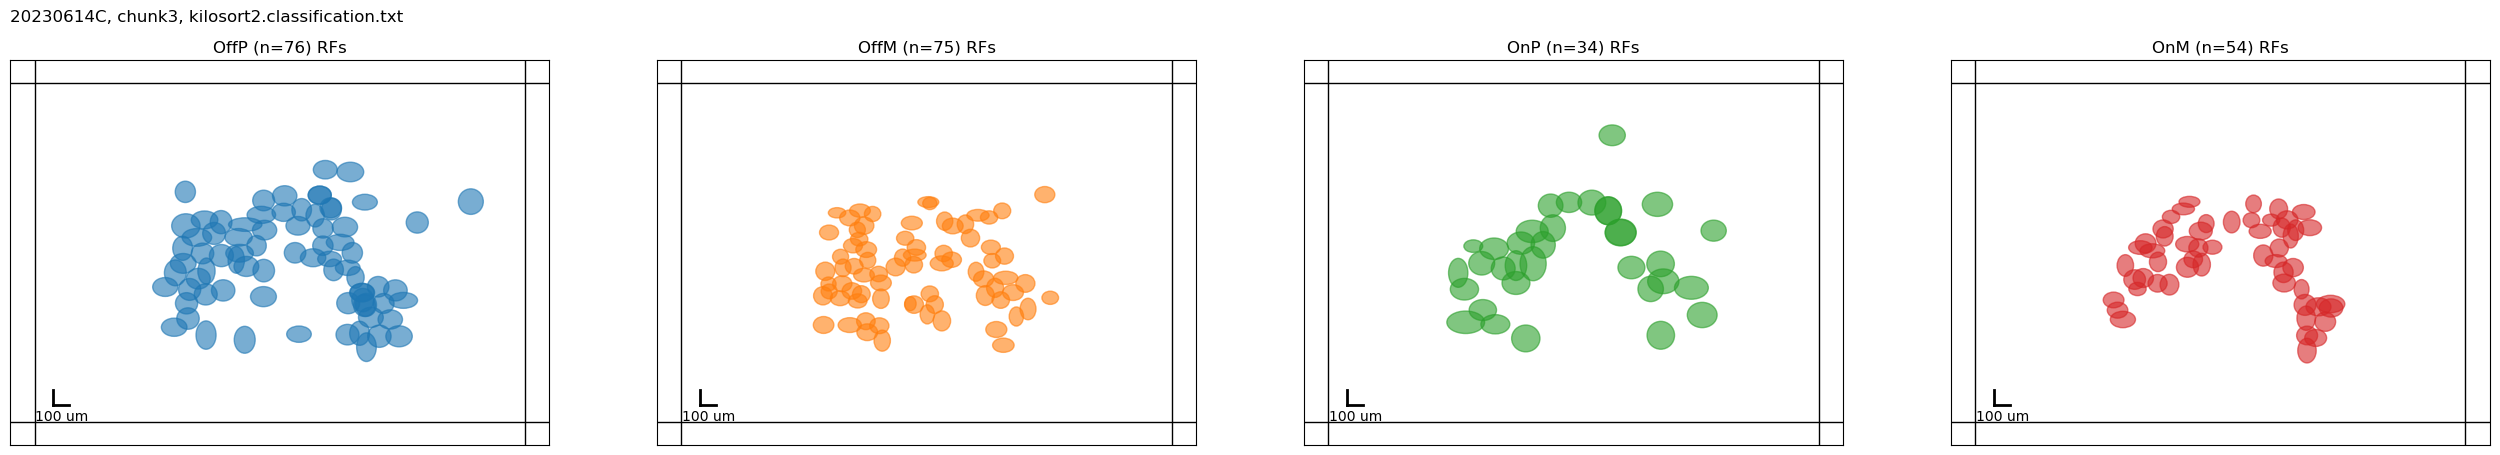

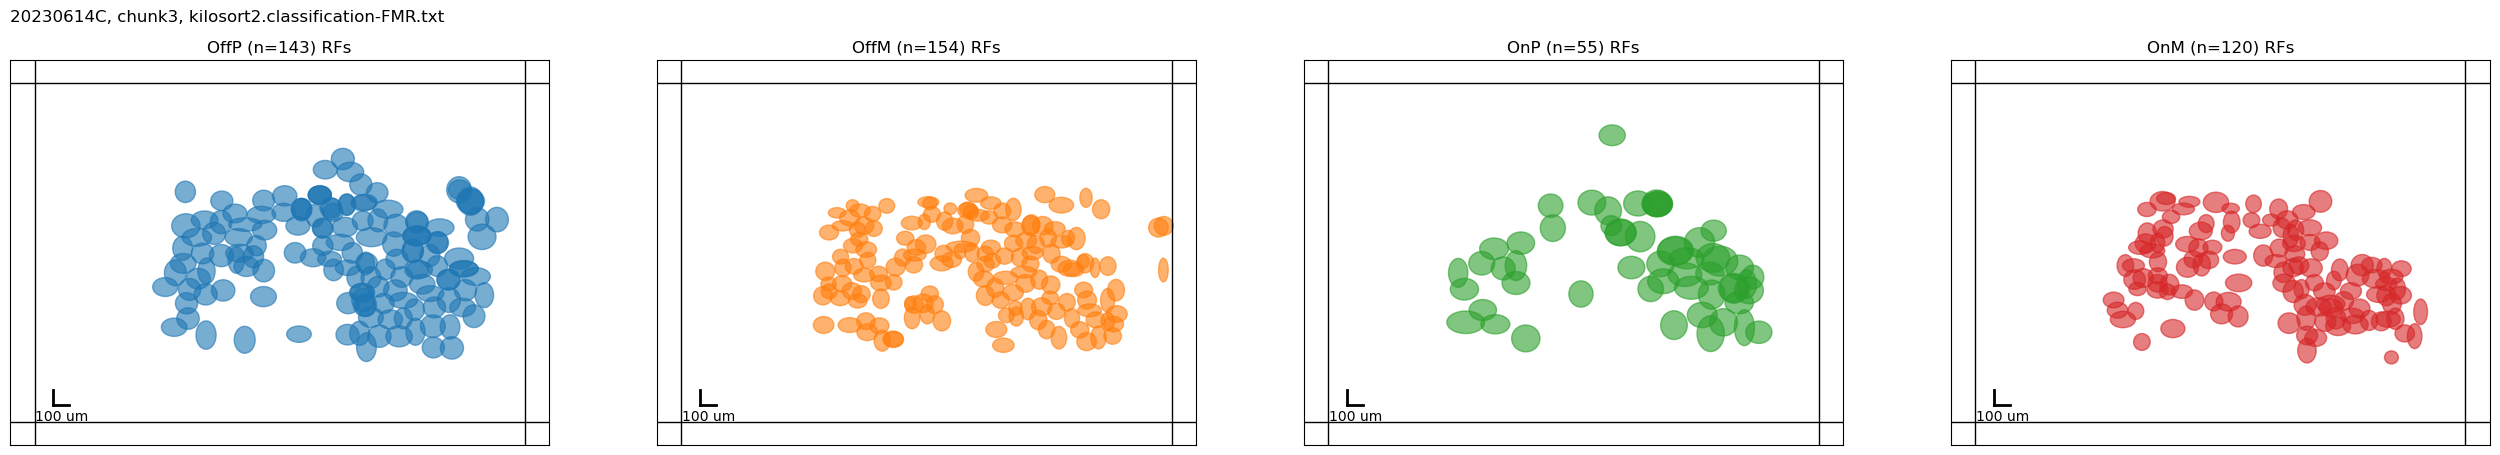

In [12]:
df_ct_meta = dju.mosaics_from_typing(df_ct.loc[:1], df_meta.loc[:1])

## Loading PSTHs

df_ct_meta has rows with all the metadata in rows I need to construct a `SpikeOutputs` object that I use to manage a single dataset.

Most commonly, I use the `load_psth` function which uses `symphony_data` methods to load the PSTH.

In [13]:
df_ct_meta

,data_dir,group_label,NDF,chunk_name,protocol_name,exp_name,data_xxx,is_mea,experiment_id,protocol_id,...,algorithm,typing_file_name,total_clusters,OffP,OffM,OnP,OnM,SBC,Amacrine,typing_file_id
0,20230614C/data018,oriented bars,0.0,chunk3,manookinlab.protocols.MovingChromaticBar,20230614C,data018,1,2,11,...,kilosort2,kilosort2.classification.txt,518,76,75,34,54,0,5,4
1,20230614C/data018,oriented bars,0.0,chunk3,manookinlab.protocols.MovingChromaticBar,20230614C,data018,1,2,11,...,kilosort2,kilosort2.classification-FMR.txt,923,143,154,55,120,0,1,5


The second typing file (kilosort2.classification-FMR.txt, typing_file_id=5) looked like it had better mosaics. Let's use that row of metadata to construct my data object.

In [14]:
tfid = 5

data = dju.mea_data_from_meta(df_ct_meta[df_ct_meta['typing_file_id'] == tfid], ls_cell_types=['OffP', 'OffM', 'OnP', 'OnM', 'SBC', 'Amacrine'])

# Load STA RF fits
data.load_sta_from_params()

# Load protocol PSTH with associated stimulus parameters. These correspond to parameters in the Symphony matlab protocol file.
ls_param_names = ['orientation', 'speed', 'contrast', 'barSize']
bin_rate = 100.0
str_protocol = 'movingchromaticbar'
data.load_psth(str_protocol, ls_param_names, bin_rate)

Loading STA RF fits from /Volumes/data-1/analysis/20230614C/chunk3/kilosort2/kilosort2.params...
Loaded STA RF fits for 923 cells.
Processing group 1 of 1 and block 1 of 1
Updating GOOD_CELL_IDS to 850 cells.
OffP: 126/143
OffM: 150/154
OnP: 46/55
OnM: 119/120
Amacrine: 1/1
Loading ISI for movingchromaticbar ['data018']...
Processing group 1 of 1 and block 1 of 1
Loaded ISI for 859 cells.


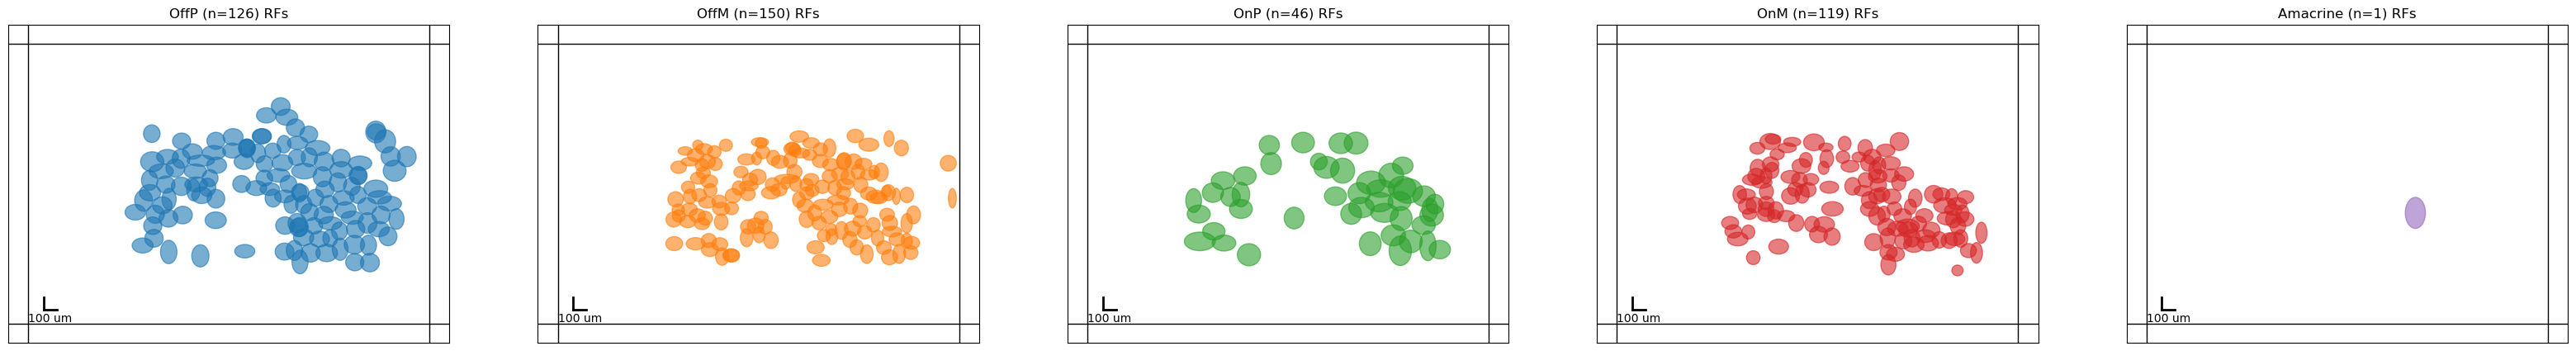

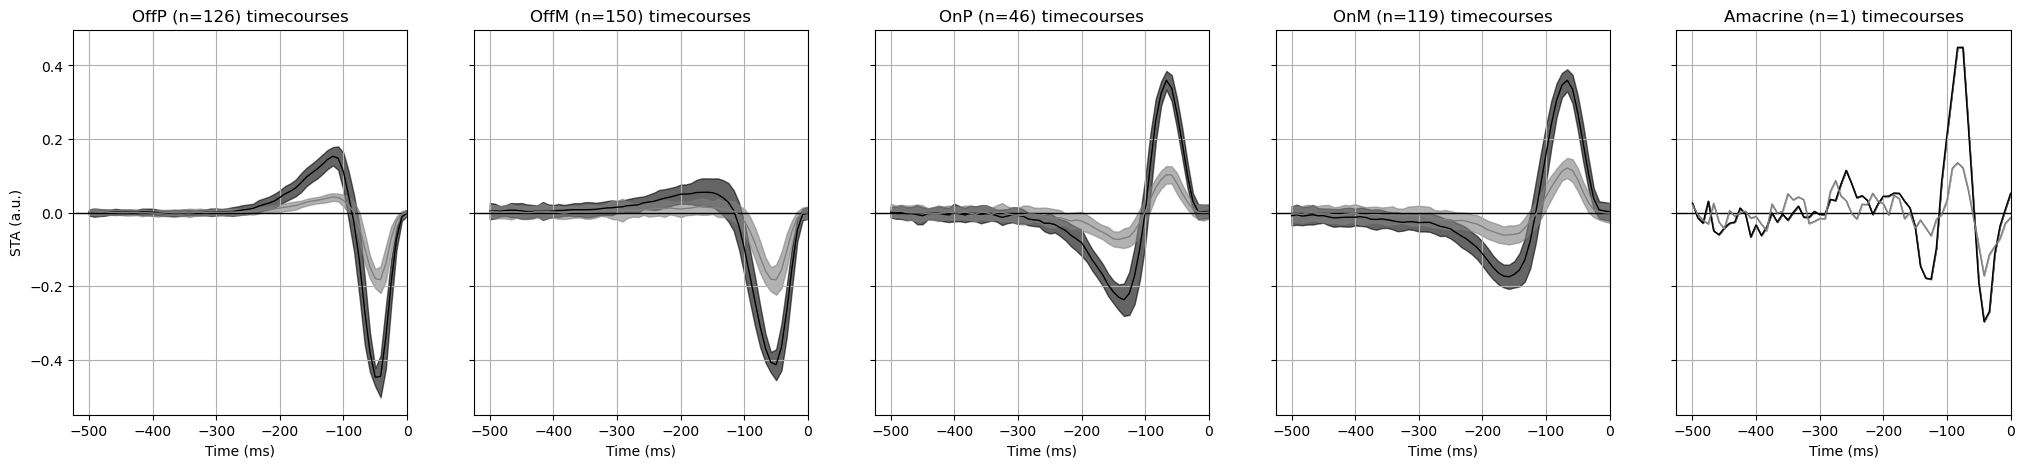

In [15]:
# Plot spatial and temporal RFs
sp.plot_type_rfs_and_tcs(data);

For the timecourses, black=yellow channel, grey=blue channel.

In [16]:
data.print_stim_summary()

epoch length: 7000.0 ms
Total epochs: 192
pre: 500.0 ms; stim: 6000.0 ms; tail: 500.0 ms
pre pts: 50; stim pts: 600; tail pts: 50
bin rate: 100.0 Hz; bin dt: 10.0 ms


The data object has 2 main dictionaries. `stim` contains stimulus info, and `spikes` contains the spike responses.

In [17]:
data.stim.keys()

dict_keys(['params', 'unique_params', 'n_epochs', 'n_pre_pts', 'n_stim_pts', 'n_tail_pts', 'n_total_pts', 'bin_rate', 'n_bin_dt', 'ls_param_names', 'str_protocol'])

In [18]:
data.stim['unique_params']

{'orientation': array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
        330.]),
 'speed': array([600.]),
 'contrast': array([-1.,  1.]),
 'barSize': array([ 200., 4000.])}

This gives me everything I need for further analysis :)

For instance, let's plot the OnP PSTHs when orientation was 0 and contrast was 1. `data.stim['params']` is a dictionary with keys for the protocol parameters, and parameter values for every epoch.

In [19]:
contrast = 1.0
orientation = 0.0
epochs = np.where((data.stim['params']['contrast'] == contrast) & (data.stim['params']['orientation'] == orientation))[0]
print(f'{len(epochs)} epochs found')

8 epochs found


Text(0, 0.5, 'OnP cells')

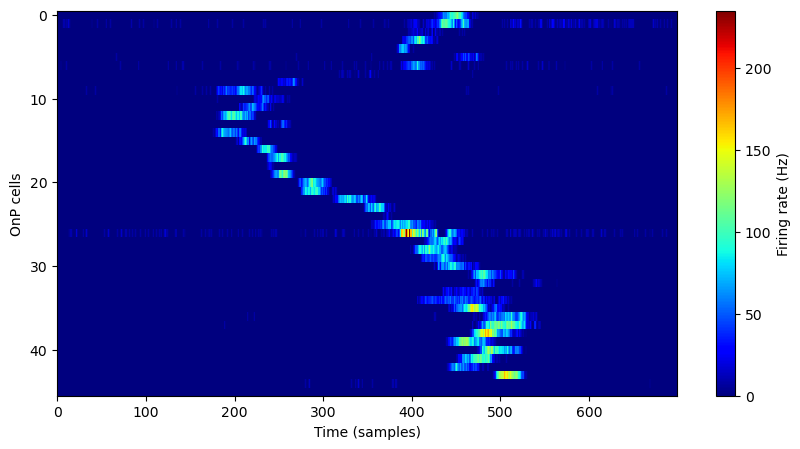

In [20]:
str_cell_type = 'OnP'
cell_ids = data.get_type_ids(str_cell_type)

psth = [data.spikes['spike_dict'][id][epochs].mean(axis=0) for id in cell_ids]
psth = np.array(psth)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
im=ax.imshow(psth, aspect='auto', cmap='jet', interpolation='none')
plt.colorbar(im, label='Firing rate (Hz)')
ax.set_xlabel('Time (samples)')
ax.set_ylabel(f'{str_cell_type} cells')

This works pretty cleanly when staying within the same spike sorting chunk. For protocols spike sorted separately, you would need to add an EI mapping step to carry over the cell type labels from WN.

I have code for this, and for QC on the cells based on ISI violations, firing rate in `eicorr` and `meaqc` modules. Can share a tutorial for this later.

## Endnotes
Here are some other things that you could do that I haven't illustrated here:
- Epoch level parameter queries (eg-movingbar with particular range of speeds)
- Compute protocol analysis value for all cells across many datasets (eg-find DS/OS/OMS cells)